<a href="https://colab.research.google.com/github/YanaSalova/PythonTasks/blob/main/triangulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv

points = []  # создаем пустой список для координат

# открываем файл с помощью функции `open` и модулем `csv`
with open('array.txt') as file:
    reader = csv.reader(file)  # создаем объект `reader` для чтения CSV
    next(reader)  # пропускаем первую строку
    for row in reader:  # итерируемся по каждой строке в файле
        x, y = map(float, row)  # преобразуем значения строк в числа с плавающей точкой
        points.append([x, y])  # добавляем координаты в список `points`


In [ ]:
print(points)

[[136.37059, -173.52946], [159.6041, -173.52946], [160.61426, -183.63099], [187.88837, -183.63099], [184.85792, -118.98123], [200.0102, -164.43809], [235.36554, -165.44825], [247.48737, -119.99139], [246.47723, -183.63099], [271.73104, -183.63099], [273.75134, -75.544671], [242.43661, -76.554823], [223.24371, -138.17413], [214.15234, -138.17413], [195.96959, -77.564976], [162.63456, -77.564976], [160.61426, -169.48886], [136.37059, -169.48885], [136.37059, -157.36702], [106.06602, -157.36702], [91.923881, -145.24519], [89.903577, -115.95077], [112.12693, -99.788333], [135.36044, -99.788333], [137.38075, -75.544671], [97.984792, -75.544671], [65.659915, -106.8594], [65.659915, -155.34672], [94.954337, -182.62084], [136.37059, -182.62084]]


In [ ]:
import random

def Point_in_triangle_modeling(triangle):
    """
    Моделирует координаты точки внутри заданного треугольника.
    triangle: список из трех точек, задающих треугольник.
    return: кортеж с координатами точки внутри треугольника.
    """
    # Генерируем два случайных числа от 0 до 1 для нахождения координат точки внутри треугольника
    a, b = random.random(), random.random()

    # Если сумма координат a и b больше 1, то меняем их местами
    if a + b > 1:
        a, b = 1 - a, 1 - b

    # Рассчитываем координаты точки внутри треугольника с помощью формулы
    x = triangle[0][0] + a * (triangle[1][0] - triangle[0][0]) + b * (triangle[2][0] - triangle[0][0])
    y = triangle[0][1] + a * (triangle[1][1] - triangle[0][1]) + b * (triangle[2][1] - triangle[0][1])

    # Возвращаем координаты точки внутри треугольника в виде кортежа
    return x, y


In [ ]:
def Triangulation(polygon_points):
    if len(polygon_points) <= 3:  # если меньше или равно 3 точек, то это уже треугольник, возвращаем исходные точки
        return polygon_points

    triangulation = []  # список для хранения треугольников, образующих триангуляцию
    i = 0

    while len(polygon_points) > 3:  # пока количество точек в многоугольнике не уменьшится до трех
        v1 = (polygon_points[i][0] - polygon_points[i - 1][0], polygon_points[i][1] - polygon_points[i - 1][1])  # вектор от i-1 до i
        v2 = (polygon_points[(i + 1) % len(polygon_points)][0] - polygon_points[i][0],
              polygon_points[(i + 1) % len(polygon_points)][1] - polygon_points[i][1])  # вектор от i до i+1 с учетом зацикленности

        if v1[0] * v2[1] - v2[0] * v1[1] > 0:  # проверяем, что точка i является выпуклым углом
            triangle = (polygon_points[i - 1], polygon_points[i], polygon_points[(i + 1) % len(polygon_points)])  # образуем треугольник
            is_valid_triangle = True
            for point in polygon_points:
                if point not in triangle and is_point_inside_triangle(point, triangle):  # проверяем, что точки не лежат на границе треугольника и что треугольник внутри многоугольника
                    is_valid_triangle = False
                    break
            if is_valid_triangle:  # если треугольник подходит, добавляем его в список треугольников и удаляем точку i
                triangulation.append(triangle)
                polygon_points.pop(i)
        i = (i + 1) % len(polygon_points)  # переходим к следующей точке в многоугольнике

    triangulation.append((polygon_points[0], polygon_points[1], polygon_points[2]))  # добавляем последний треугольник в список
    return triangulation


def is_point_inside_triangle(point, triangle):
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    d1 = sign(point, triangle[0], triangle[1])
    d2 = sign(point, triangle[1], triangle[2])
    d3 = sign(point, triangle[2], triangle[0])

    has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
    has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)

    return not (has_neg and has_pos)


In [ ]:
def PointsModeling(triangulation, i):
    # создаем пустой список для хранения площадей треугольников
    S = []
    # проходим по каждому треугольнику в triangulation
    for triangle in triangulation:
        # Считаем площадь треугольника
        # вычисляем вектора из вершин треугольника
        v1 = (triangle[1][0] - triangle[0][0], triangle[1][1] - triangle[0][1])
        v2 = (triangle[2][0] - triangle[0][0], triangle[2][1] - triangle[0][1])
        # вычисляем площадь треугольника и добавляем ее в список S
        S.append(abs(v1[0] * v2[1] - v2[0] * v1[1]) / 2)

    # выбираем случайные треугольники с вероятностью пропорциональной их площадям
    trianguls = random.choices(triangulation, S, k=i)
    # моделируем точки внутри каждого выбранного треугольника
    points_inside = map(Point_in_triangle_modeling, trianguls)

    # возвращаем список сгенерированных точек
    return list(points_inside)

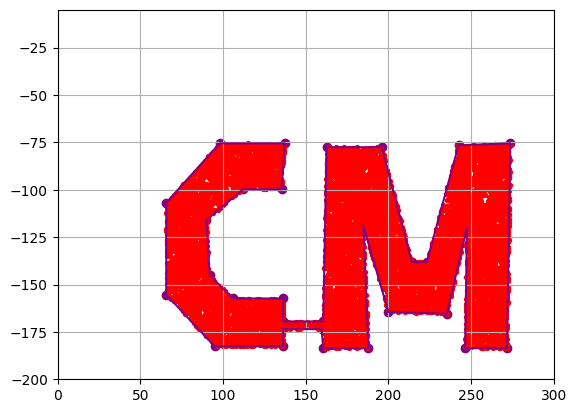

In [ ]:
import matplotlib.pyplot as plt
i = 10000

fig, ax = plt.subplots(1)
ax.set_xlim([0, 300])
ax.set_ylim([-200, -5])
ax.grid()

#Моделируем вершины
Boundary = points
BoundaryX = [Boundary[i][0] for i in range(len(Boundary))]
BoundaryY = [Boundary[i][1] for i in range(len(Boundary))]
#Рисуем вершины
ax.scatter(BoundaryX, BoundaryY, color='purple')
ax.plot(BoundaryX + BoundaryX[0:1], BoundaryY + BoundaryY[0:1], color='purple')

# Моделируем точки внутри многоугольника
points = PointsModeling(Triangulation(Boundary), i)
pointsX = [points[i][0] for i in range(i)]
pointsY = [points[i][1] for i in range(i)]
#Рисуем точки
ax.scatter(pointsX, pointsY, color='red', s = 8)

plt.show()



In [ ]:
Triangulation(Boundary)

[[246.47723, -183.63099], [137.38075, -75.544671], [94.954337, -182.62084]]